In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


## to ignore waarning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/prane/OneDrive - IIT Kanpur/Documents/machine learning/Fraud.csv")

In [3]:
data = df.copy()
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isnull().any().any()

False

In [7]:
data.shape

(6362620, 11)

In [8]:
data['isFraud'].unique()

array([0, 1], dtype=int64)

In [9]:
data['isFraud'].value_counts()  # data is very imbalanced

isFraud
0    6354407
1       8213
Name: count, dtype: int64

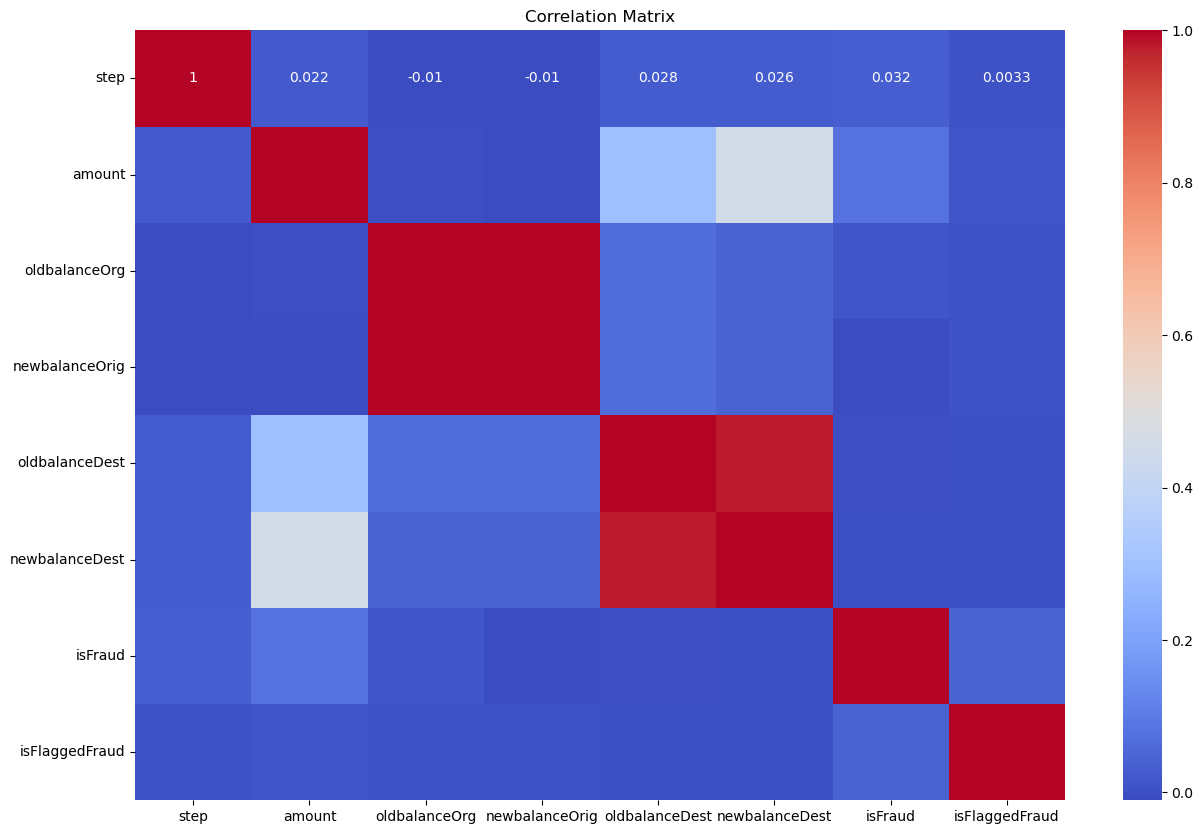

In [10]:
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
categorical_columns = ['type', 'nameOrig', 'nameDest']


# import matplotlib.colors as mcolors

# # Create a custom colormap from blue to green
# colors = ["darkblue", "lightblue", "white", "pink", 'darkred']
# cmap = mcolors.LinearSegmentedColormap.from_list("blue_to_green", colors)


corr = data[numerical_columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


plt.show()


In [11]:
# need to drop oldbalanceOrg and newbalanceDest

In [12]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

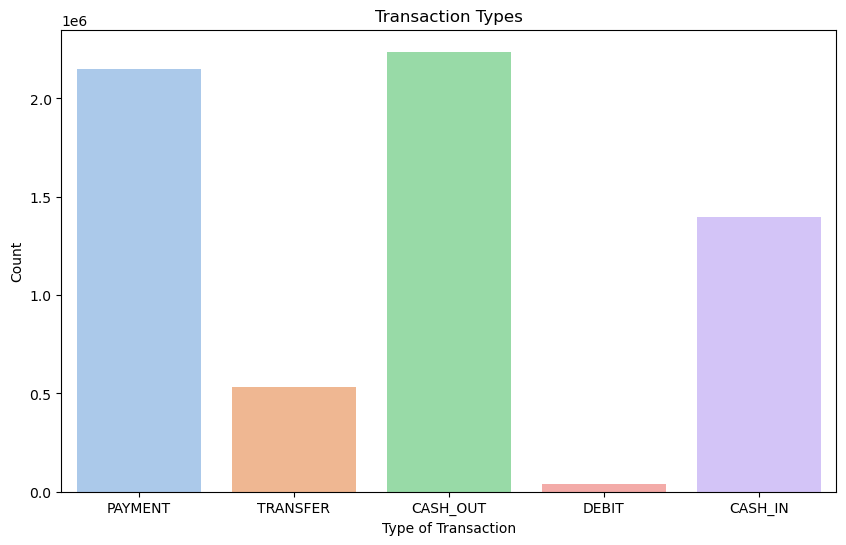

In [13]:
# Transaction types 

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, palette='pastel')
plt.title('Transaction Types')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.show()

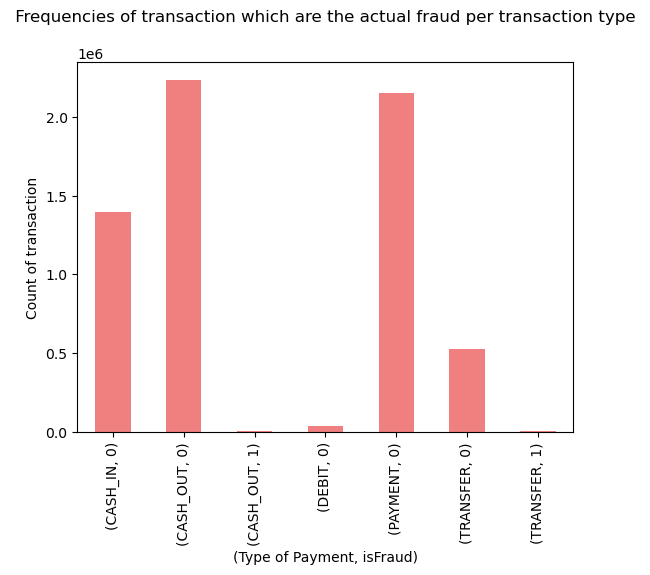

In [14]:
# fraud transactions by transaction type

fraud_type = df.groupby(['type', 'isFraud']).size().plot(kind='bar', color = 'lightcoral')
fraud_type.set_title(" Frequencies of transaction which are the actual fraud per transaction type \n" )
fraud_type.set_xlabel("(Type of Payment, isFraud)")
fraud_type.set_ylabel("Count of transaction")

plt.show()

In [16]:
# Check for balance inaccuracies

df['origBalance_inacc'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['destBalance_inacc'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:", round(df['origBalance_inacc'].value_counts(normalize=True)[1] * 100, 2))
print("Balance Error(%) at the destination:", round(df['destBalance_inacc'].value_counts(normalize=True)[1] * 100, 2))


Balance Error(%) at the origin: 85.09
Balance Error(%) at the destination: 74.45


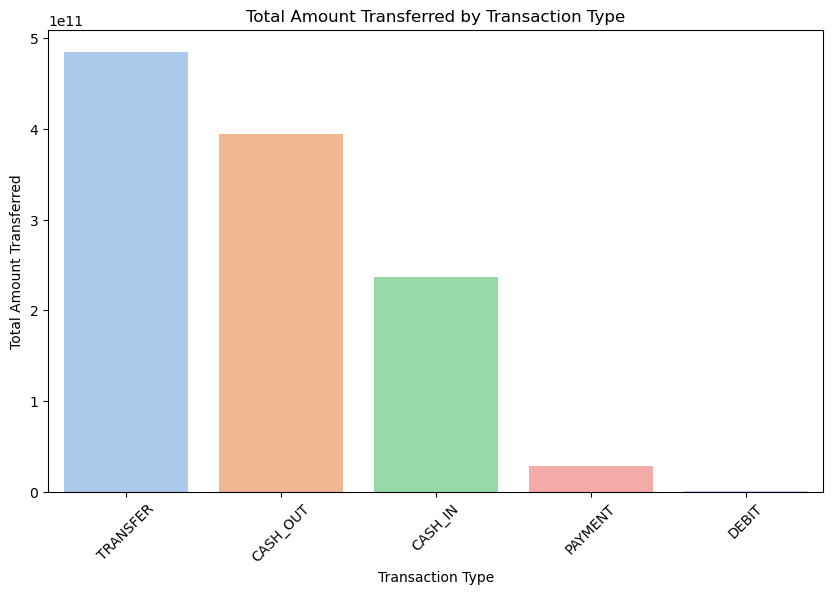

In [17]:
# total amount transferred by transaction type

total_amount_by_type = data.groupby('type')['amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='amount', data=total_amount_by_type, palette='pastel')
plt.title('Total Amount Transferred by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount Transferred')
plt.xticks(rotation=45)
plt.show()

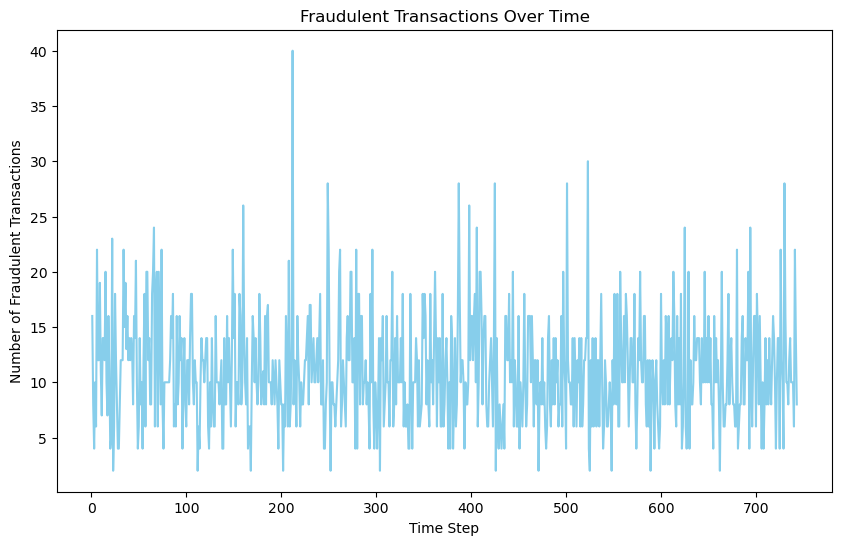

In [18]:
# Fraud transactions over time

fraud_time_series = data[data['isFraud'] == 1].groupby('step').size()

plt.figure(figsize=(10, 6))
fraud_time_series.plot(kind='line', color='skyblue')
plt.xlabel("Time Step")
plt.ylabel("Number of Fraudulent Transactions")
plt.title('Fraudulent Transactions Over Time')
plt.show()

In [19]:
X = df.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()


,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,PAYMENT,9839.64,160296.36,0.0,0,1
1,PAYMENT,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,PAYMENT,11668.14,29885.86,0.0,0,1


In [20]:
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# time for one hot encoding

dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)

X_train = pd.concat([X_train, dummies_type], axis=1)
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1186641,CASH_IN,186994.49,191974.49,2565463.66,1,1,False,False,False,False
1199598,CASH_OUT,86377.61,0.00,0.00,1,0,True,False,False,False
1185636,CASH_OUT,215489.19,0.00,6345756.55,1,1,True,False,False,False
6211424,TRANSFER,697319.21,0.00,2150239.95,1,0,False,False,False,True
4452703,PAYMENT,59243.58,0.00,0.00,1,1,False,False,True,False


In [23]:
X_train = X_train.drop(columns=['type'])

In [24]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

X_test = pd.concat([X_test, dummies_type], axis=1)
X_test.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,CASH_IN,330218.42,351084.42,452419.57,1,1,False,False,False,False
264914,PAYMENT,11647.08,18722.92,0.00,0,1,False,False,True,False
85647,CASH_IN,152264.21,258853.21,201303.01,1,1,False,False,False,False
5899326,TRANSFER,1551760.63,0.00,3198359.45,1,0,False,False,False,True
2544263,CASH_IN,78172.30,2999503.88,415821.90,1,1,False,False,False,False


In [25]:
X_test = X_test.drop(columns=['type'])

In [26]:
# Logistic Regression Model

lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9686726215848719


In [27]:
y_pred_lr = lr_model.predict(X_test)

precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("F1-score (Logistic Regression):", f1_lr)

Precision (Logistic Regression): 0.03874994518585649
Recall (Logistic Regression): 0.9943735933983496
F1-score (Logistic Regression): 0.07459305842794636


In [28]:
# Random Forest model

rf = RandomForestClassifier(class_weight="balanced")

rf_model = rf.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.9999928560032195

In [29]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-score (Random Forest):", f1_rf)

Precision (Random Forest): 0.9992467043314501
Recall (Random Forest): 0.9951237809452363
F1-score (Random Forest): 0.9971809810186055
